In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, f1_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv('Resources/train.csv')

# Split the dataset into training and testing sets first
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Impute missing values for continuous features
imputer = SimpleImputer(strategy='mean')
for column in ['Age', 'Fare']:
    train_data[column] = imputer.fit_transform(train_data[[column]])
    test_data[column] = imputer.transform(test_data[[column]])

# Drop rows with missing categorical data in training; impute or drop in test
train_data.dropna(subset=['Embarked'], inplace=True)
test_data.dropna(subset=['Embarked'], inplace=True)

# Encoding categorical variables
label_encoder = LabelEncoder()
for column in ['Sex', 'Embarked']:
    train_data[column] = label_encoder.fit_transform(train_data[column])
    test_data[column] = label_encoder.transform(test_data[column])

# Feature Scaling
scaler = StandardScaler()
numeric_features = ['Age', 'Fare']
train_data[numeric_features] = scaler.fit_transform(train_data[numeric_features])
test_data[numeric_features] = scaler.transform(test_data[numeric_features])

# Select features and target
X_train = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_train = train_data['Survived']
X_test = test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_test = test_data['Survived']

# Initialize and train models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_prob)
    f1 = f1_score(y_test, y_pred)
    logloss = log_loss(y_test, y_pred_prob)
    results[name] = (auc, f1, logloss)

# Display results
for name, scores in results.items():
    print(f"{name} - AUC: {scores[0]:.2f}, F1 Score: {scores[1]:.2f}, Log Loss: {scores[2]:.2f}")

# PCA Example
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
model = LogisticRegression()
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
y_pred_prob = model.predict_proba(X_test_pca)[:, 1]
auc = roc_auc_score(y_test, y_pred_prob)
f1 = f1_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_prob)

print(f"PCA with Logistic Regression - AUC: {auc:.2f}, F1 Score: {f1:.2f}, Log Loss: {logloss:.2f}")


Logistic Regression - AUC: 0.88, F1 Score: 0.76, Log Loss: 0.42
Decision Tree - AUC: 0.79, F1 Score: 0.74, Log Loss: 6.68
SVM - AUC: 0.84, F1 Score: 0.77, Log Loss: 0.47
Naive Bayes - AUC: 0.85, F1 Score: 0.74, Log Loss: 0.57
KNN - AUC: 0.86, F1 Score: 0.77, Log Loss: 1.35
Random Forest - AUC: 0.88, F1 Score: 0.78, Log Loss: 0.44
Gradient Boosting - AUC: 0.88, F1 Score: 0.76, Log Loss: 0.41
AdaBoost - AUC: 0.85, F1 Score: 0.76, Log Loss: 0.67
PCA with Logistic Regression - AUC: 0.70, F1 Score: 0.43, Log Loss: 0.62


In [3]:
from sklearn.ensemble import GradientBoostingClassifier

# Assuming X_train and y_train are already defined and preprocessed:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Get feature importance
feature_importance = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

print(importance_df)


    Feature  Importance
1       Sex    0.466540
5      Fare    0.162500
0    Pclass    0.153362
2       Age    0.136990
3     SibSp    0.054020
6  Embarked    0.019907
4     Parch    0.006681


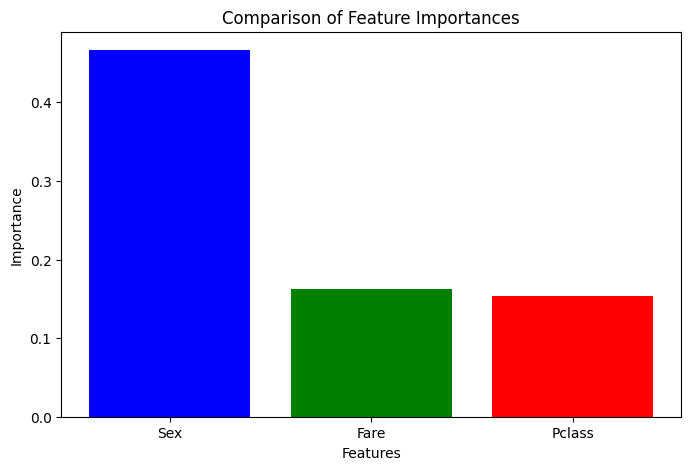

In [5]:
import matplotlib.pyplot as plt

# Feature names and their importances
features = ['Sex', 'Fare', 'Pclass']
importances = [0.466540, 0.162500, 0.153362]

plt.figure(figsize=(8, 5))  # Set the figure size
plt.bar(features, importances, color=['blue', 'green', 'red'])  # Create a bar chart
plt.xlabel('Features')  # Label for the x-axis
plt.ylabel('Importance')  # Label for the y-axis
plt.title('Comparison of Feature Importances')  # Title of the chart
plt.show()


C:\Users\gonzh\AppData\Local\Temp\ipykernel_76640\3506221920.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=data, ci=None, palette='pastel')
C:\Users\gonzh\AppData\Local\Temp\ipykernel_76640\3506221920.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=data, ci=None, palette='pastel')


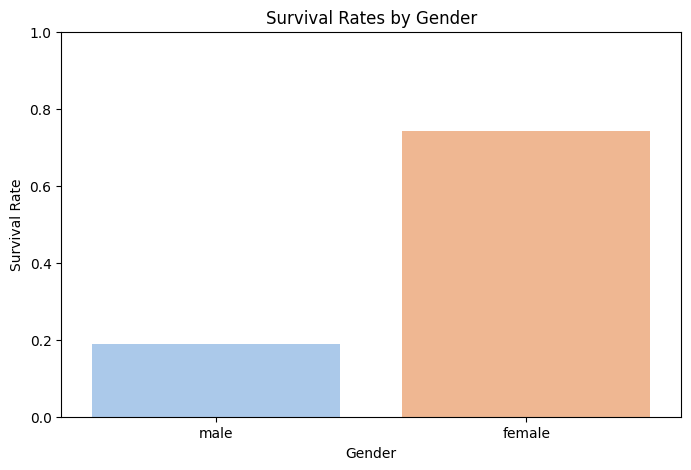

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Resources/train.csv')

# Plotting using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=data, ci=None, palette='pastel')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.title('Survival Rates by Gender')
plt.ylim(0, 1)  # Set y-axis to show proportions from 0 to 1
plt.show()
